<font color='green'> 
**Youtube - Aladdin Persson Kanalı - TensorFlow 2.0 Beginner Tutorials serisi**
    
TensorFlow Tutorial 2 - Tensor Basics - Aladdin Persson anlattı. 
</font>

**Video:** [TensorFlow Tutorial 2 - Tensor Basics](https://www.youtube.com/watch?v=HPjBY1H-U4U&list=PLhhyoLH6IjfxVOdVC1P1L5z5azs0XjMsb&index=2)

### İçindekiler

**Initialization of Tensors**
* How we create a tensor?
* How we create a matrix? 

**Mathematical Operations**
* Four Transactions 
* Dot Product
* Exponentiation
* Matrix Multiplication

**Indexing**

**Reshaping**

### <font color="blue"> Giriş </font>

From programming perspective a tensor is multi-dimensional array that has ability to be run on the gpu. From a more mathematical perspective a tensor is a generalization of a scalar vector and matrix.

* Vector: one-dimensional tensor
* Matrix: two-dimensional tensor

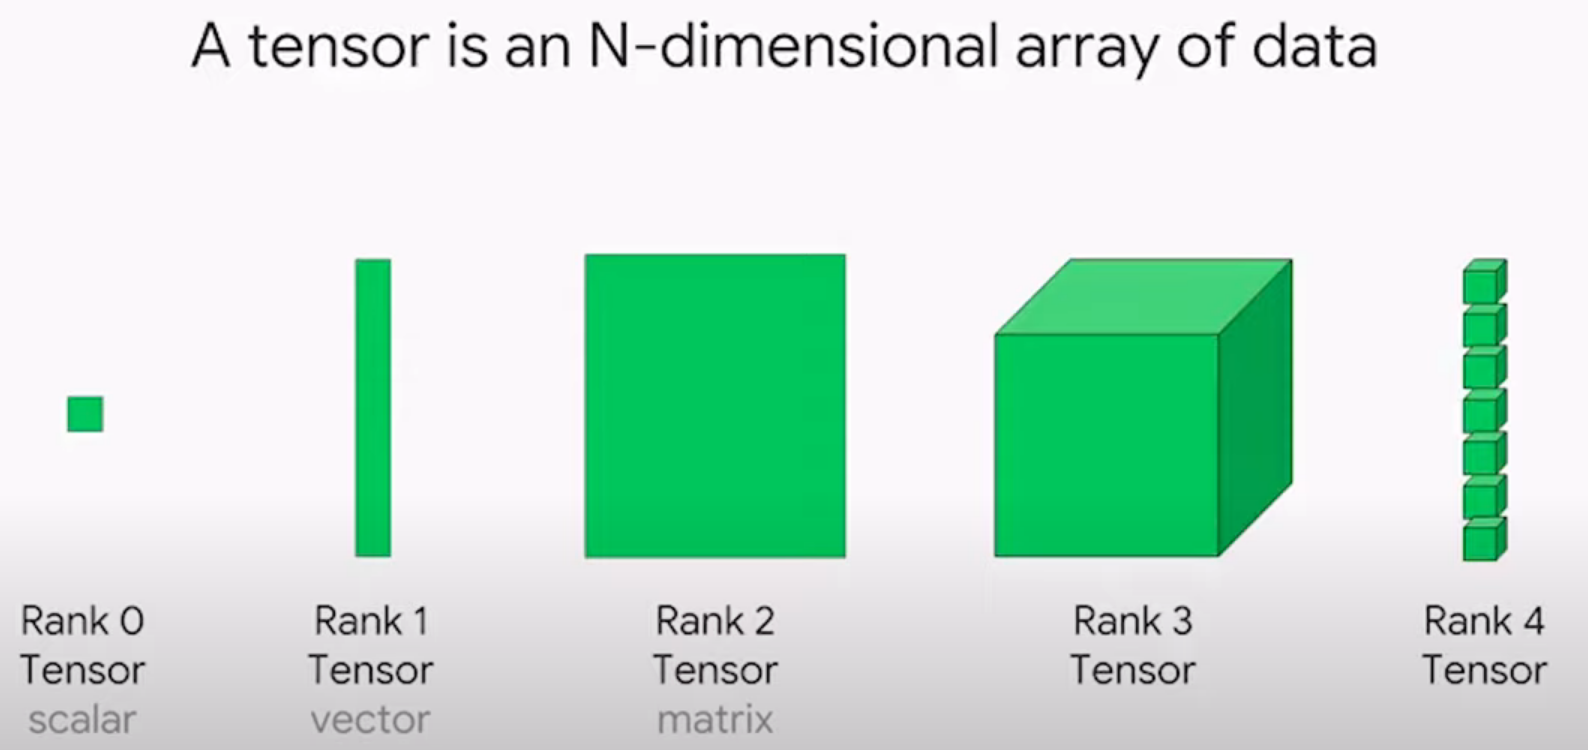

In [ ]:
import tensorflow as tf

Tensorflow will not allocate all of the memory on the gpu sometimes you can obtain errors and if you do then add these two lines but if you don't have a problem you shouldn't need to add those.

In [105]:
pyhsical_devices = tf.config.list_physical_devices('GPU')

tf.config.experimental.set_memory_growth(pyhsical_devices[0], True) # bende hiç gpu olmadığı için hata veriyor.

IndexError: list index out of range

#### [Check if tensorflow is using gpu](https://www.codegrepper.com/code-examples/python/check+if+tensorflow+is+using+gpu)

**If GPU is available tensorflow uses it, otherwise it uses CPU**

In [3]:
tf.config.list_physical_devices(
    device_type=None
)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [102]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


#### ---

### 1. Initialization of Tensors

#### <font color="blue"> 1.1. How we create a tensor? </font>

In [8]:
x = tf.constant(4)

print(x) # it has no shape

tf.Tensor(4, shape=(), dtype=int32)


In [9]:
x = tf.constant(4.0)

print(x)  # float now.

tf.Tensor(4.0, shape=(), dtype=float32)


In [10]:
x = tf.constant(4, shape = (1,1)) # shape de ekleyebiliriz.

print(x)

tf.Tensor([[4]], shape=(1, 1), dtype=int32)


In [11]:
x = tf.constant(4, shape = (1,1), dtype = tf.float32 ) # dtype'ını da kendimiz belirleyebiliriz.

print(x)

tf.Tensor([[4.]], shape=(1, 1), dtype=float32)


**Burada shape'ini belirtmemiz tensor üzerinde farklı işlemler yapacağımız zaman önemli olabiliyor.**

#### <font color="blue"> 1.2. How we create a matrix? (2 dimensional tensor) </font>

In [13]:
x = tf.constant([[1,2,3],[4,5,6]]) # Her biri 3 columndan oluşan 2 row oluşturacak. 

**Ayrıca bir listenin içinde yazıyoruz rowları bu önemli.**

In [15]:
print(x)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


<font color="purple"> **Manuel olarak oluşturmak yerine `tf.ones((4,2))`, `tf.zeros((4,3))`, `tf.eye(3)`, `tf.range(9)`, `tf.random.normal((3,3), mean=0, stddev=1)` ve `tf.random.uniform((1,3), minval=0, maxval=1)` gibi kodlarla otomatik olarak oluşmasını da sağlayabiliriz.**   </font>

In [27]:
x = tf.ones((4,2))

print(x)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]], shape=(4, 2), dtype=float32)


In [28]:
x = tf.zeros((4,3))

print(x)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float32)


In [29]:
x = tf.eye(3) # I for the identity matrix (eye)

print(x)

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [37]:
x = tf.range(9) # vektor oluşturuyor.

print(x)

tf.Tensor([0 1 2 3 4 5 6 7 8], shape=(9,), dtype=int32)


In [39]:
x = tf.range(start=1, limit=10, delta=2)  # delta stepi ifade ediyor. 

print(x)

tf.Tensor([1 3 5 7 9], shape=(5,), dtype=int32)


In [127]:
x = tf.range(start=1, limit=10, delta=2)  # delta stepi ifade ediyor. 

print(x)

tf.Tensor([1 3 5 7 9], shape=(5,), dtype=int32)


<font color="purple"> **Burada "int32" tipinde vektör üretmiş olduk. `tf.cast(x, dtype = tf.float64)` koduyla belli bir data tipine dönüştürebiliriz ürettiğimiz vektörleri, matrisleri. "tf.float(16,32,64)", "tf.int(8,16,32,64)", "tf.bool" tiplerine dönüştürebiliriz.**  </font>

In [40]:
x = tf.cast(x, dtype = tf.float64)

print(x)

tf.Tensor([1. 3. 5. 7. 9.], shape=(5,), dtype=float64)


**Belli distiributiondan gelen matrixler de oluşturabiliriz.** 

##### <font color="blue"> Normal Distribution </font>

In [30]:
x = tf.random.normal((3,3), mean=0, stddev=1)  # İlk parantez dimensionı belirtiyor. Daha fazla boyut da ekleyebiliriz oraya.

print(x)

tf.Tensor(
[[ 0.13259631  0.20634009  0.14161338]
 [-2.1108437  -0.5799024   1.3637757 ]
 [-0.07712847 -0.51660115 -0.19842583]], shape=(3, 3), dtype=float32)


##### <font color="blue"> Uniform Distribution </font>

In [41]:
x = tf.random.uniform((1,3), minval=0, maxval=1) # (1,3) boyutlu olması vektörü ifade ediyor.

print(x)

tf.Tensor([[0.61925733 0.4239304  0.4650421 ]], shape=(1, 3), dtype=float32)


### 2. Mathematical Operations

#### <font color="blue"> 2.1. Four Transactions </font>

In [45]:
x = tf.constant([1,2,3])
y = tf.constant([9,8,7])

In [46]:
z = tf.add(x,y)

print(z)

tf.Tensor([10 10 10], shape=(3,), dtype=int32)


In [50]:
z = x + y  # bu şekilde de yapabiliriz toplama işlemini

print(z)

tf.Tensor([10 10 10], shape=(3,), dtype=int32)


In [51]:
z = tf.subtract(x,y)

print(z)

tf.Tensor([-8 -6 -4], shape=(3,), dtype=int32)


In [52]:
z = x-y # bu şekilde de yapabiliriz çıkarma işlemini

print(z)

tf.Tensor([-8 -6 -4], shape=(3,), dtype=int32)


In [53]:
z = tf.divide(x,y) 

print(z)

tf.Tensor([0.11111111 0.25       0.42857143], shape=(3,), dtype=float64)


In [54]:
z = x/y # bu şekilde de yapabiliriz bölme işlemini

print(z)

tf.Tensor([0.11111111 0.25       0.42857143], shape=(3,), dtype=float64)


In [55]:
z = tf.multiply(x,y) 

print(z)

tf.Tensor([ 9 16 21], shape=(3,), dtype=int32)


In [56]:
z = x*y # bu şekilde de yapabiliriz çarpma işlemini

print(z)

tf.Tensor([ 9 16 21], shape=(3,), dtype=int32)


#### <font color="blue"> 2.2. Dot Product </font>

**Dot productta her bir elemanı aynı şekilde çarpıyor element wise olarak normal çarpım gibi, ek olarak bunları topluyor.**

In [130]:
x = tf.constant([1,2,3])
y = tf.constant([9,8,7])

In [132]:
z = tf.tensordot(x,y, axes=1)

print(z)

tf.Tensor(46, shape=(), dtype=int32)


In [134]:
z = tf.reduce_sum(x*y, axis=0)  # Yukarıdakiyle aynı sonucu elde edebiliyoruz bu şekilde de.

print(z)

tf.Tensor(46, shape=(), dtype=int32)


#### <font color="blue"> 2.3. Exponentiation </font>

In [135]:
x = tf.constant([1,2,3])
y = tf.constant([9,8,7])

In [136]:
z = x**5  # element wise olarak her bir elemanın üssünü alıyor.

print(z)

tf.Tensor([  1  32 243], shape=(3,), dtype=int32)


#### <font color="blue"> 2.4. Matrix Multiplication </font>

In [78]:
x = tf.ones((2,3))
y = tf.constant([[1,2,3,4],[5,6,7,8],[9,10,11,12]])

In [79]:
print("x:", x)
print("\n")
print("y:", y)

x: tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


y: tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)


In [81]:
y = tf.cast(y, dtype = tf.float32)  # bu dönüşümü yapmazsak hata veriyor z = tf.matmul(x,y) kodu.

In [82]:
print(y)

tf.Tensor(
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]], shape=(3, 4), dtype=float32)


In [83]:
z = tf.matmul(x,y) 

print(z)

tf.Tensor(
[[15. 18. 21. 24.]
 [15. 18. 21. 24.]], shape=(2, 4), dtype=float32)


In [85]:
z = x @ y  # Yukarıdakiyle aynı sonucu elde ediyoruz.

print(z)

tf.Tensor(
[[15. 18. 21. 24.]
 [15. 18. 21. 24.]], shape=(2, 4), dtype=float32)


### 3. Indexing

In [140]:
x = tf.constant([0, 1, 1, 2, 3, 1, 2, 3])

In [108]:
print(x[:]) # bütün elemanları basar

tf.Tensor([0 1 1 2 3 1 2 3], shape=(8,), dtype=int32)


In [109]:
print(x[1:]) # ilk eleman haricindekileri bastık

tf.Tensor([1 1 2 3 1 2 3], shape=(7,), dtype=int32)


In [110]:
print(x[1:3]) # 1 ve 2. indeksi alıyor

tf.Tensor([1 1], shape=(2,), dtype=int32)


In [143]:
print(x[::2]) # 2'şer atlayarak çıktı veriyor

tf.Tensor([0 1 3 2], shape=(4,), dtype=int32)


In [112]:
print(x[::-1]) # ters sırada bastırıyor

tf.Tensor([3 2 1 3 2 1 1 0], shape=(8,), dtype=int32)


**Belli indekse ait değerleri almak istediğimizde:**

In [113]:
indices = tf.constant([0,3])
x_ind = tf.gather(x,indices)
print(x_ind)

tf.Tensor([0 2], shape=(2,), dtype=int32)


**Matris için yaparsak aynı işlemi:**

In [118]:
x = tf.constant([[1,2],
                [3,4],
                [5,6]])

In [119]:
print(x[0,:]) # ilk satırdaki her şeyi al demiş oluyoruz

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2])>

In [121]:
print(x[0:])

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]])>

In [125]:
print(x[0:2,:]) # İlk iki satırı alıyor (son yazdığımız içinde olmamış oluyor)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


### 4. Reshaping

In [150]:
x = tf.range(9)

print(x)

tf.Tensor([0 1 2 3 4 5 6 7 8], shape=(9,), dtype=int32)


In [151]:
x = tf.reshape(x, (3,3)) # parantez içinde boyutunu belirliyoruz.

print(x)

tf.Tensor(
[[0 1 2]
 [3 4 5]
 [6 7 8]], shape=(3, 3), dtype=int32)


In [154]:
# rowları column yapmak istediğimizde:
x = tf.transpose(x, perm=[1,0]) 

print(x)

tf.Tensor(
[[0 3 6]
 [1 4 7]
 [2 5 8]], shape=(3, 3), dtype=int32)


**Axislerin değişmesini sağlıyor `perm=[1,0]` kodu. İkiden fazla boyutta da uygulayabiliriz bunu.**